In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_t=pd.read_csv('Iris.csv')

In [4]:
data_t.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data_t=data_t.drop(['Id'],axis=1)

In [6]:
data_t.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [67]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


C:\Users\Neeladri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Neeladri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Neeladri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Neeladri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Neeladri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Neeladri\Anaconda3\lib\site-packa

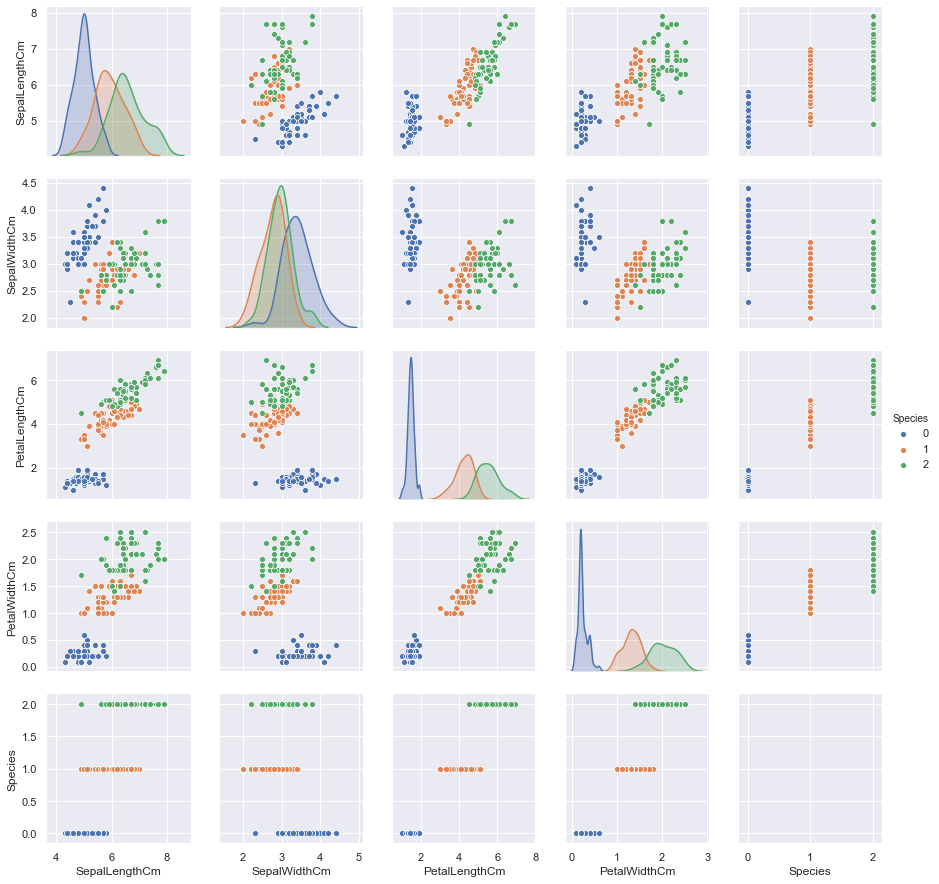

In [69]:
import seaborn as sns
sns.set()
sns.pairplot(data=data_t,hue='Species')

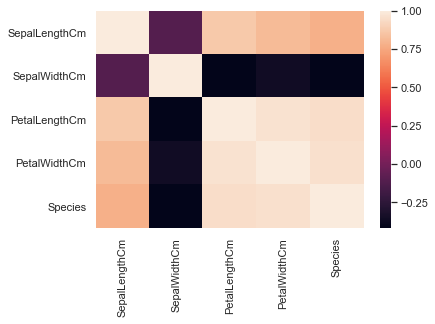

In [70]:
sns.heatmap(data_t.corr())

In [7]:
data_t.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data_t['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
data_t['Species']=data_t['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [10]:
data_t.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data_t)
data_t_scaled=scaler.transform(data_t)

In [75]:
data_t=data_t.drop(['SepalWidthCm'],axis=1)

   #####                                          a.) Multivariate Linear Regression

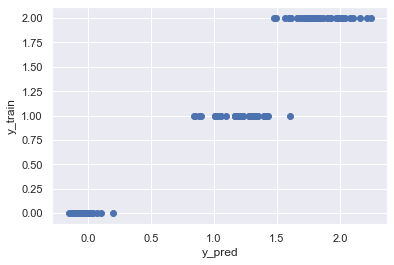

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=data_t.drop(['Species'],axis=1)
y=data_t['Species']
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21) 
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_train)
plt.scatter(y_pred,y_train)
plt.xlabel('y_pred')
plt.ylabel('y_train')
plt.show()

In [100]:
from sklearn.metrics import r2_score
r_squared=r2_score(y_train,y_pred)
print(r_squared)

0.9313267013856408


In [101]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_pred)

0.04685045038801843

#### b.)Logistic Regression

C:\Users\Neeladri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Neeladri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


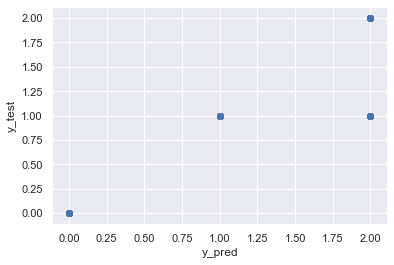

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X=data_t.drop(['Species'],axis=1)
y=data_t['Species']
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21) 
regressor=LogisticRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [80]:
from sklearn.metrics import r2_score
r_squared=r2_score(y_test,y_pred)
print(r_squared)

0.6564885496183205


In [81]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.2

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=False)

24

In [83]:
accuracy=(24/30)*100
accuracy

80.0

#### c.)Artificial Neural Network

In [84]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
X=data_t.drop(['Species'],axis=1)
y=data_t['Species']

In [85]:
y=y.map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})

In [86]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [87]:
y=pd.get_dummies(y)

In [88]:
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [89]:
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42) 

In [94]:
model=Sequential()
model.add(Dense(output_dim=10,activation='relu',input_dim=3))
model.add(Dense(output_dim=10,activation='relu'))
model.add(Dense(output_dim=10,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(output_dim=3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

C:\Users\Neeladri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=3, units=10)`
  
C:\Users\Neeladri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Neeladri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10)`
  after removing the cwd from sys.path.
C:\Users\Neeladri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3)`
  


In [95]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                40        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 33        
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________


In [96]:
history=model.fit(X_train,y_train,nb_epoch=100,validation_data=(X_test, y_test))

C:\Users\Neeladri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 135 samples, validate on 15 samples
Epoch 1/100
135/135 [==============================] - 1s 5ms/step - loss: 1.0853 - accuracy: 0.3111 - val_loss: 1.0818 - val_accuracy: 0.4000
Epoch 2/100
135/135 [==============================] - 0s 84us/step - loss: 1.0831 - accuracy: 0.2815 - val_loss: 1.0806 - val_accuracy: 0.4000
Epoch 3/100
135/135 [==============================] - 0s 112us/step - loss: 1.0765 - accuracy: 0.2741 - val_loss: 1.0788 - val_accuracy: 0.0667
Epoch 4/100
135/135 [==============================] - 0s 89us/step - loss: 1.0708 - accuracy: 0.2593 - val_loss: 1.0751 - val_accuracy: 0.1333
Epoch 5/100
135/135 [==============================] - 0s 118us/step - loss: 1.0701 - accuracy: 0.3037 - val_loss: 1.0703 - val_accuracy: 0.2667
Epoch 6/100
135/135 [==============================] - 0s 118us/step - loss: 1.0593 - accuracy: 0.4519 - val_loss: 1.0628 - val_accuracy: 0.4000
Epoch 7/100
135/135 [==============================] - 0s 111us/step - loss: 1.0575 - acc

Epoch 57/100
135/135 [==============================] - 0s 103us/step - loss: 0.5148 - accuracy: 0.8370 - val_loss: 0.4335 - val_accuracy: 0.8667
Epoch 58/100
135/135 [==============================] - 0s 89us/step - loss: 0.4704 - accuracy: 0.8593 - val_loss: 0.4285 - val_accuracy: 0.7333
Epoch 59/100
135/135 [==============================] - 0s 133us/step - loss: 0.4875 - accuracy: 0.8074 - val_loss: 0.4206 - val_accuracy: 0.8667
Epoch 60/100
135/135 [==============================] - 0s 96us/step - loss: 0.4307 - accuracy: 0.8593 - val_loss: 0.4131 - val_accuracy: 0.8667
Epoch 61/100
135/135 [==============================] - 0s 89us/step - loss: 0.4614 - accuracy: 0.8148 - val_loss: 0.4055 - val_accuracy: 0.8667
Epoch 62/100
135/135 [==============================] - 0s 103us/step - loss: 0.4756 - accuracy: 0.8296 - val_loss: 0.3955 - val_accuracy: 0.8667
Epoch 63/100
135/135 [==============================] - 0s 96us/step - loss: 0.4254 - accuracy: 0.8963 - val_loss: 0.3863 - val

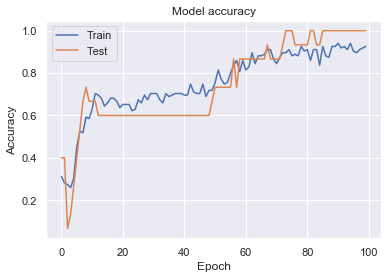

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

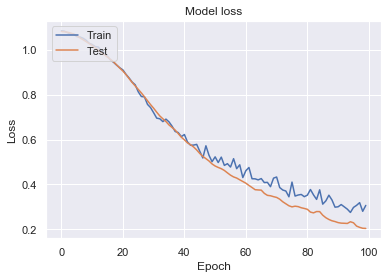

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()